<a href="https://colab.research.google.com/github/kvamsiitb/Data_structure/blob/main/quip_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

## Initial defines of num qubits and graph topology, and other parameters

In [ ]:
#Nqub = 2
#AdjMatrixGraph = [[0,1],[1,0]]
#Nqub = 3
#AdjMatrixGraph = [[0,1,1],[1,0,1],[1,1,0]]
#AdjMatrixGraph = [[0,1,0],[1,0,1],[0,1,0]]
Nqub = 4
AdjMatrixGraph = [[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]]
Nqub = 6
AdjMatrixGraph = [[0,1,1,1,1,1],[1,0,1,1,1,1],[1,1,0,1,1,1],[1,1,1,0,1,1],[1,1,1,1,0,1],[1,1,1,1,1,0]]
Nqub = 5
AdjMatrixGraph = [[0,1,1,1,1],[1,0,1,1,1],[1,1,0,1,1],[1,1,1,0,1],[1,1,1,1,0]]
string = 'IXYAB' #A is XY, B is YY
if Nqub > 3 and Nqub < 6:
  string = string+'CD'#C for second XY, D for second YY
if Nqub >= 6:
  string = string+'EF'#E for third XY, F for third YY

## Creating set of permutations of the operators. From these we will filter the valid ones

In [ ]:
def toString(List): 
    return ''.join(List) 

arr = []
def allLexicographicRecur (string, data, last, index): 
    length = len(string) 
    for i in range(length): 
        data[index] = string[i] 
        if index==last: 
            arr.append(toString(data))
        else: 
            allLexicographicRecur(string, data, last, index+1) 
  
def allLexicographic(string, length_required): 
    length = length_required

    data = [""] * (length+1) 

    string = sorted(string) 
    allLexicographicRecur(string, data, length-1, 0)
allLexicographic(string, Nqub) 
print(arr)


['AAAAA', 'AAAAB', 'AAAAC', 'AAAAD', 'AAAAI', 'AAAAX', 'AAAAY', 'AAABA', 'AAABB', 'AAABC', 'AAABD', 'AAABI', 'AAABX', 'AAABY', 'AAACA', 'AAACB', 'AAACC', 'AAACD', 'AAACI', 'AAACX', 'AAACY', 'AAADA', 'AAADB', 'AAADC', 'AAADD', 'AAADI', 'AAADX', 'AAADY', 'AAAIA', 'AAAIB', 'AAAIC', 'AAAID', 'AAAII', 'AAAIX', 'AAAIY', 'AAAXA', 'AAAXB', 'AAAXC', 'AAAXD', 'AAAXI', 'AAAXX', 'AAAXY', 'AAAYA', 'AAAYB', 'AAAYC', 'AAAYD', 'AAAYI', 'AAAYX', 'AAAYY', 'AABAA', 'AABAB', 'AABAC', 'AABAD', 'AABAI', 'AABAX', 'AABAY', 'AABBA', 'AABBB', 'AABBC', 'AABBD', 'AABBI', 'AABBX', 'AABBY', 'AABCA', 'AABCB', 'AABCC', 'AABCD', 'AABCI', 'AABCX', 'AABCY', 'AABDA', 'AABDB', 'AABDC', 'AABDD', 'AABDI', 'AABDX', 'AABDY', 'AABIA', 'AABIB', 'AABIC', 'AABID', 'AABII', 'AABIX', 'AABIY', 'AABXA', 'AABXB', 'AABXC', 'AABXD', 'AABXI', 'AABXX', 'AABXY', 'AABYA', 'AABYB', 'AABYC', 'AABYD', 'AABYI', 'AABYX', 'AABYY', 'AACAA', 'AACAB', 'AACAC', 'AACAD', 'AACAI', 'AACAX', 'AACAY', 'AACBA', 'AACBB', 'AACBC', 'AACBD', 'AACBI', 'AACBX', 

##Function to validate a test string

In [ ]:

# ith entry in the string corresponds to ith qubit
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

def validate_string(string, Graph):
  # Number of As, Bs, Cs, Ds, Es, Fs are even
  # AA, BB, ... should be between qubits that are connected in the graph
  # CD can exist only if AB exist
  # EF can exist only if both AB and CD exist

  # A, C, E are for XY operation. B, D, F for YY. Each pair of AA, BB etc can occur only once, to distinguish the different ones. We shall explore atmost 7 qubits, so 6 letters are enough!
  # So their max value is 2
  if (string.count('A') > 2) or (string.count('B') > 2) or (string.count('C') > 2) or (string.count('D') > 2) or (string.count('E') > 2) or (string.count('F') > 2):
    return False
  # A,B,C,D,E,F always occur in pairs
  if (string.count('A')%2 != 0) or (string.count('B')%2 != 0) or (string.count('C')%2 != 0) or (string.count('D')%2 != 0) or (string.count('E')%2 != 0) or (string.count('F')%2 != 0):
    return False
  
  # C can exist only if A exists, E only if A and C exist
  if ('C' in string) and ('A' not in string):
    return False
  if ('E' in string) and (('A' not in string) or ('C' not in string)):
    return False
  # Same as prev two, but for B, D, F
  if ('D' in string) and ('B' not in string):
    return False
  if ('F' in string) and (('B' not in string) or ('D' not in string)):
    return False
  
  ## AACC and CCAA are the same case, for 4qub or more this issue will come up. Same with AAEECC and AACCEE
  if ('A' in string) and ('C' in string):
    idx1 = find(string, 'A')
    idx2 = find(string, 'C')
    if idx1[0] > idx2[0]:
      return False
  if ('A' in string) and ('C' in string) and ('E' in string):
    idx1 = find(string, 'C')
    idx2 = find(string, 'E')
    if idx1[0] > idx2[0]:
      return False
  ## Same as prev two if conditions but for B, D, F
  if ('B' in string) and ('D' in string):
    idx1 = find(string, 'B')
    idx2 = find(string, 'D')
    if idx1[0] > idx2[0]:
      return False
  if ('B' in string) and ('D' in string) and ('F' in string):
    idx1 = find(string, 'D')
    idx2 = find(string, 'F')
    if idx1[0] > idx2[0]:
      return False
  
  ## For all A,B,C,D,E,F checking if the connection is valid on the graph topology
  if 'A' in string:
    idx = find(string, 'A')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  if 'B' in string:
    idx = find(string, 'B')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  if 'C' in string:
    idx = find(string, 'C')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  if 'D' in string:
    idx = find(string, 'D')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  if 'E' in string:
    idx = find(string, 'E')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  if 'F' in string:
    idx = find(string, 'F')
    if Graph[idx[0]][idx[1]] != 1:
      return False
  return True

## Sm_new elements
pls format text cells

In [ ]:
## Creating Smnew
final_arr = []
for i in arr:
  if validate_string(i, AdjMatrixGraph):
    final_arr.append(i)
print(final_arr)
print(len(final_arr))

['AABBI', 'AABBX', 'AABBY', 'AABIB', 'AABXB', 'AABYB', 'AACCI', 'AACCX', 'AACCY', 'AACIC', 'AACXC', 'AACYC', 'AAIBB', 'AAICC', 'AAIII', 'AAIIX', 'AAIIY', 'AAIXI', 'AAIXX', 'AAIXY', 'AAIYI', 'AAIYX', 'AAIYY', 'AAXBB', 'AAXCC', 'AAXII', 'AAXIX', 'AAXIY', 'AAXXI', 'AAXXX', 'AAXXY', 'AAXYI', 'AAXYX', 'AAXYY', 'AAYBB', 'AAYCC', 'AAYII', 'AAYIX', 'AAYIY', 'AAYXI', 'AAYXX', 'AAYXY', 'AAYYI', 'AAYYX', 'AAYYY', 'ABABI', 'ABABX', 'ABABY', 'ABAIB', 'ABAXB', 'ABAYB', 'ABBAI', 'ABBAX', 'ABBAY', 'ABBIA', 'ABBXA', 'ABBYA', 'ABIAB', 'ABIBA', 'ABXAB', 'ABXBA', 'ABYAB', 'ABYBA', 'ACACI', 'ACACX', 'ACACY', 'ACAIC', 'ACAXC', 'ACAYC', 'ACCAI', 'ACCAX', 'ACCAY', 'ACCIA', 'ACCXA', 'ACCYA', 'ACIAC', 'ACICA', 'ACXAC', 'ACXCA', 'ACYAC', 'ACYCA', 'AIABB', 'AIACC', 'AIAII', 'AIAIX', 'AIAIY', 'AIAXI', 'AIAXX', 'AIAXY', 'AIAYI', 'AIAYX', 'AIAYY', 'AIBAB', 'AIBBA', 'AICAC', 'AICCA', 'AIIAI', 'AIIAX', 'AIIAY', 'AIIIA', 'AIIXA', 'AIIYA', 'AIXAI', 'AIXAX', 'AIXAY', 'AIXIA', 'AIXXA', 'AIXYA', 'AIYAI', 'AIYAX', 'AIYAY', 

## Creating the (IZ)^n and (IXYZ)^n vectors

In [ ]:
# I, sigx, sigy, sigz
arr = []
allLexicographic('IXYZ', Nqub) 
for i in range(len(arr)):
  arr[i] = arr[i][:Nqub]
val = ''
mu = [i for i in list(dict.fromkeys(arr)) if i != val]
print((mu))

arr = []
allLexicographic('IZ', Nqub) 
for i in range(len(arr)):
  arr[i] = arr[i][:Nqub]
val = ''
z_basis = [i for i in list(dict.fromkeys(arr)) if i != val]
print((z_basis))

['IIIII', 'IIIIX', 'IIIIY', 'IIIIZ', 'IIIXI', 'IIIXX', 'IIIXY', 'IIIXZ', 'IIIYI', 'IIIYX', 'IIIYY', 'IIIYZ', 'IIIZI', 'IIIZX', 'IIIZY', 'IIIZZ', 'IIXII', 'IIXIX', 'IIXIY', 'IIXIZ', 'IIXXI', 'IIXXX', 'IIXXY', 'IIXXZ', 'IIXYI', 'IIXYX', 'IIXYY', 'IIXYZ', 'IIXZI', 'IIXZX', 'IIXZY', 'IIXZZ', 'IIYII', 'IIYIX', 'IIYIY', 'IIYIZ', 'IIYXI', 'IIYXX', 'IIYXY', 'IIYXZ', 'IIYYI', 'IIYYX', 'IIYYY', 'IIYYZ', 'IIYZI', 'IIYZX', 'IIYZY', 'IIYZZ', 'IIZII', 'IIZIX', 'IIZIY', 'IIZIZ', 'IIZXI', 'IIZXX', 'IIZXY', 'IIZXZ', 'IIZYI', 'IIZYX', 'IIZYY', 'IIZYZ', 'IIZZI', 'IIZZX', 'IIZZY', 'IIZZZ', 'IXIII', 'IXIIX', 'IXIIY', 'IXIIZ', 'IXIXI', 'IXIXX', 'IXIXY', 'IXIXZ', 'IXIYI', 'IXIYX', 'IXIYY', 'IXIYZ', 'IXIZI', 'IXIZX', 'IXIZY', 'IXIZZ', 'IXXII', 'IXXIX', 'IXXIY', 'IXXIZ', 'IXXXI', 'IXXXX', 'IXXXY', 'IXXXZ', 'IXXYI', 'IXXYX', 'IXXYY', 'IXXYZ', 'IXXZI', 'IXXZX', 'IXXZY', 'IXXZZ', 'IXYII', 'IXYIX', 'IXYIY', 'IXYIZ', 'IXYXI', 'IXYXX', 'IXYXY', 'IXYXZ', 'IXYYI', 'IXYYX', 'IXYYY', 'IXYYZ', 'IXYZI', 'IXYZX', 'IXYZY', 

## Functions to perform single qubit, two qubit measurements, and to return value corresponding to  a mu and measurement setting

In [ ]:
def single_qub_meas(b, mu):
  if b=='X':
    if (mu == 'Z'):
      return 'Y', 1
    elif (mu == 'Y'):
      return 'Z', -1
    else:
      return b, 1
  elif b=='Y':
    if (mu == 'Z'):
      return 'X', 1
    elif (mu == 'X'):
      return 'Z', 1
    else:
      return b, 1
  elif b=='Z':
    if (mu == 'X'):
      return 'Y', 1
    elif (mu == 'Y'):
      return 'X', 1
    else:
      return b, 1
  else:
    return b, 1

def two_qub_meas(b1, b2, mu):
  if mu == 'A' or mu == 'C' or mu == 'E':
    if (b1=='X' and b2=='X'):
      return 'I', 'Z', -1
    elif (b1=='Y' and b2=='Y'):
      return 'Z', 'I', 1
    elif (b1=='I' and b2=='I') or (b1=='Z' and b2=='Z'):
      return b1, b2, 1
    else:
      return 'X', 'Y', 1
  if mu == 'B' or mu == 'D' or mu == 'F':
    if (b1=='X' and b2=='Y') or (b1=='Y' and b2=='X'):
      return 'I', 'Z', -1
    elif (b1=='I' and b2=='I') or (b1=='Z' and b2=='Z'):
      return b1, b2, 1
    else:
      return 'X', 'Y', 1

def value(strB, strMu):
  out = ''
  sign = 1
  if ('A' in strB):
    idx = find(strB, 'A')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'A')
    out = out + a + b
    sign = sign*s
  if ('C' in strB):
    idx = find(strB, 'C')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'C')
    out = out + a + b
    sign = sign*s
  if ('E' in strB):
    idx = find(strB, 'E')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'E')
    out = out + a + b
    sign = sign*s
  if ('B' in strB):
    idx = find(strB, 'B')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'B')
    out = out + a + b
    sign = sign*s
  if ('D' in strB):
    idx = find(strB, 'D')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'D')
    out = out + a + b
    sign = sign*s
  if ('F' in strB):
    idx = find(strB, 'F')
    a,b,s = two_qub_meas(strMu[idx[0]], strMu[idx[1]], 'F')
    out = out + a + b
    sign = sign*s
  if ('X' in strB):
    idx = find(strB, 'X')
    for i in idx:
      v,s = single_qub_meas(strMu[i], 'X')
      out = out+ v
      sign = sign*s
  if ('Y' in strB):
    idx = find(strB, 'Y')
    for i in idx:
      v,s = single_qub_meas(strMu[i], 'Y')
      out = out+ v
      sign = sign*s
  if ('I' in strB):
    idx = find(strB, 'I')
    for i in idx:
      v,s = single_qub_meas(strMu[i], 'I')
      out = out+ v
      sign = sign*s
  if out in z_basis:
    return sign
  else:
    return 0

## Create A matrix

In [ ]:
A = np.zeros((len(final_arr),len(mu)))

for i in range(len(final_arr)):
  for j in range(len(mu)):
    A[i,j] = value(final_arr[i], mu[j])

print(A)

[[ 1.  0.  0. ...  0.  0.  1.]
 [ 1.  0.  1. ...  0.  1.  0.]
 [ 1. -1.  0. ... -1.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  1. ...  0.  0.  0.]
 [ 1. -1.  0. ...  0.  0.  0.]]


In [ ]:
print (mu)

['IIIII', 'IIIIX', 'IIIIY', 'IIIIZ', 'IIIXI', 'IIIXX', 'IIIXY', 'IIIXZ', 'IIIYI', 'IIIYX', 'IIIYY', 'IIIYZ', 'IIIZI', 'IIIZX', 'IIIZY', 'IIIZZ', 'IIXII', 'IIXIX', 'IIXIY', 'IIXIZ', 'IIXXI', 'IIXXX', 'IIXXY', 'IIXXZ', 'IIXYI', 'IIXYX', 'IIXYY', 'IIXYZ', 'IIXZI', 'IIXZX', 'IIXZY', 'IIXZZ', 'IIYII', 'IIYIX', 'IIYIY', 'IIYIZ', 'IIYXI', 'IIYXX', 'IIYXY', 'IIYXZ', 'IIYYI', 'IIYYX', 'IIYYY', 'IIYYZ', 'IIYZI', 'IIYZX', 'IIYZY', 'IIYZZ', 'IIZII', 'IIZIX', 'IIZIY', 'IIZIZ', 'IIZXI', 'IIZXX', 'IIZXY', 'IIZXZ', 'IIZYI', 'IIZYX', 'IIZYY', 'IIZYZ', 'IIZZI', 'IIZZX', 'IIZZY', 'IIZZZ', 'IXIII', 'IXIIX', 'IXIIY', 'IXIIZ', 'IXIXI', 'IXIXX', 'IXIXY', 'IXIXZ', 'IXIYI', 'IXIYX', 'IXIYY', 'IXIYZ', 'IXIZI', 'IXIZX', 'IXIZY', 'IXIZZ', 'IXXII', 'IXXIX', 'IXXIY', 'IXXIZ', 'IXXXI', 'IXXXX', 'IXXXY', 'IXXXZ', 'IXXYI', 'IXXYX', 'IXXYY', 'IXXYZ', 'IXXZI', 'IXXZX', 'IXXZY', 'IXXZZ', 'IXYII', 'IXYIX', 'IXYIY', 'IXYIZ', 'IXYXI', 'IXYXX', 'IXYXY', 'IXYXZ', 'IXYYI', 'IXYYX', 'IXYYY', 'IXYYZ', 'IXYZI', 'IXYZX', 'IXYZY', 

In [ ]:
print(final_arr)

['AABBI', 'AABBX', 'AABBY', 'AABIB', 'AABXB', 'AABYB', 'AACCI', 'AACCX', 'AACCY', 'AACIC', 'AACXC', 'AACYC', 'AAIBB', 'AAICC', 'AAIII', 'AAIIX', 'AAIIY', 'AAIXI', 'AAIXX', 'AAIXY', 'AAIYI', 'AAIYX', 'AAIYY', 'AAXBB', 'AAXCC', 'AAXII', 'AAXIX', 'AAXIY', 'AAXXI', 'AAXXX', 'AAXXY', 'AAXYI', 'AAXYX', 'AAXYY', 'AAYBB', 'AAYCC', 'AAYII', 'AAYIX', 'AAYIY', 'AAYXI', 'AAYXX', 'AAYXY', 'AAYYI', 'AAYYX', 'AAYYY', 'ABABI', 'ABABX', 'ABABY', 'ABAIB', 'ABAXB', 'ABAYB', 'ABBAI', 'ABBAX', 'ABBAY', 'ABBIA', 'ABBXA', 'ABBYA', 'ABIAB', 'ABIBA', 'ABXAB', 'ABXBA', 'ABYAB', 'ABYBA', 'ACACI', 'ACACX', 'ACACY', 'ACAIC', 'ACAXC', 'ACAYC', 'ACCAI', 'ACCAX', 'ACCAY', 'ACCIA', 'ACCXA', 'ACCYA', 'ACIAC', 'ACICA', 'ACXAC', 'ACXCA', 'ACYAC', 'ACYCA', 'AIABB', 'AIACC', 'AIAII', 'AIAIX', 'AIAIY', 'AIAXI', 'AIAXX', 'AIAXY', 'AIAYI', 'AIAYX', 'AIAYY', 'AIBAB', 'AIBBA', 'AICAC', 'AICCA', 'AIIAI', 'AIIAX', 'AIIAY', 'AIIIA', 'AIIXA', 'AIIYA', 'AIXAI', 'AIXAX', 'AIXAY', 'AIXIA', 'AIXXA', 'AIXYA', 'AIYAI', 'AIYAX', 'AIYAY', 

## Define the model. First solving on regular solver

In [ ]:
# If using this on Google collab, we need to install the packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Let's start with Pyomo
if IN_COLAB:
    !pip install -q pyomo
    !apt-get install -y -qq coinor-cbc
    !pip install dwave-ocean-sdk
    !wget -N -q "https://ampl.com/dl/open/couenne/couenne-linux64.zip"
    !unzip -o -q couenne-linux64

In [ ]:
# Import the Pyomo library, which can be installed via pip, conda or from Github https://github.com/Pyomo/pyomo
import pyomo.environ as pyo
# Import Matplotlib to generate plots
import matplotlib.pyplot as plt
# Import numpy and scipy for certain numerical calculations below
import numpy as np
from scipy.special import gamma
import math

In [ ]:
B = np.absolute(A.T)
c = np.ones((B.shape[1],))

# Define the model
model = pyo.ConcreteModel(name='QST regular method')
#Define the variables
model.x = pyo.Var(range(B.shape[1]), domain=pyo.Binary)
# Define the objective function
def obj(m):
  return pyo.summation(c, m.x)

model.obj = pyo.Objective(rule = obj, sense=pyo.minimize)
model.c = pyo.ConstraintList()

for i in range(B.shape[0]):
  model.c.add(pyo.summation(B[i,:], model.x) >= 1)

model.pprint()

2 Set Declarations
    c_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any : 1024 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Initializing the solver
opt_cbc = pyo.SolverFactory('cbc', executable='/usr/bin/cbc')

#Solving the problem with CBC
result_obj = opt_cbc.solve(model, tee=False)
model.display()

  Signal handler called from  /usr/lib/python3.6/subprocess.py _try_wait 1424
  Waiting...
  Signaled process 1234 with signal 2
ERROR: Solver (cbc) returned non-zero return code (-1)
ERROR: Solver log: Welcome to the CBC MILP Solver Version: 2.9.9 Build Date:
    Aug 21 2017

    command line - /usr/bin/cbc -printingOptions all -import
    /tmp/tmphykqop5i.pyomo.lp -stat=1 -solve -solu /tmp/tmphykqop5i.pyomo.soln
    (default strategy 1) Option for printingOptions changed from normal to all
    Presolve 1024 (-1) rows, 963 (-1) columns and 30816 (-1) elements
    Statistics for presolved model Original problem has 963 integers (963 of
    which binary) Presolved problem has 963 integers (963 of which binary)
    ==== 0 zero objective 1 different 963 variables have objective of 1 ====
    absolute objective values 1 different 963 variables have objective of 1
    ==== for integers 0 zero objective 1 different 963 variables have
    objective of 1 ==== for integers absolute objective va

ApplicationError: ignored

## Modelling as QUBO

In [ ]:
opt_couenne = pyo.SolverFactory('couenne', executable='/content/couenne')

m = 4
rho = 800
B = np.absolute(A.T)
B = B[1:]
M, n = B.shape
b = np.ones([M,1])
#print(b)

In [ ]:
s = 2**np.arange(m)
z = np.zeros(m)
S = np.zeros([M,M*m])
for i in range(M):
  for j in range(m):
    S[i,m*i+j] = -1*s[j]
Bres = np.concatenate((B,S),1)
print(Bres)
c = np.ones((Bres.shape[1],))
c[B.shape[1]:] = 0

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ... -2. -4. -8.]]


In [ ]:
Q = rho*np.matmul(Bres.T,Bres)
print(Q)
Q += np.diag(c)
Q -= rho*2*np.diag(np.matmul(b.T,Bres)[0])
cQ = rho*np.matmul(b.T,b)
print(Q.shape)
print(cQ[0,0])

[[12000.  5600.  5600. ... -1600. -3200. -6400.]
 [ 5600. 12000.  5600. ... -1600. -3200. -6400.]
 [ 5600.  5600. 12000. ... -1600. -3200. -6400.]
 ...
 [-1600. -1600. -1600. ...  3200.  6400. 12800.]
 [-3200. -3200. -3200. ...  6400. 12800. 25600.]
 [-6400. -6400. -6400. ... 12800. 25600. 51200.]]
(1221, 1221)
204000.0


In [ ]:
# Define the model
model = pyo.ConcreteModel(name='QST QUBO method')
#Define the variables
model.x = pyo.Var(range(Bres.shape[1]), domain=pyo.Binary)
# Define the objective function
def obj(m):
  sum = 0
  for i in range(Bres.shape[1]):
    for j in range(Bres.shape[1]):
      sum += Q[i,j]*model.x[i]*model.x[j]
  return sum
  
model.obj = pyo.Objective(rule = obj, sense=pyo.minimize)
model.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :  171 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170}

1 Var Declarations
    x : Size=171, Index=x_index
        Key : Lower : Value : Upper : Fixed : Sta

In [ ]:
#Solving the problem with COUENNE
result_obj = opt_couenne.solve(model, tee=False)
model.display()

## Simulated Annealing!!

In [ ]:
import networkx as nx
import dimod
import neal
from scipy.special import gamma
import math
from collections import Counter
import pandas as pd
from itertools import chain
G = nx.from_numpy_matrix(Q)
#nx.draw(G, with_labels=True)

In [ ]:
model_qubo = dimod.BinaryQuadraticModel.from_qubo(Q, offset=cQ)


def plot_enumerate(results, title=None):

    plt.figure()

    energies = [datum.energy for datum in results.data(
        ['energy'], sorted_by=None)]
    
    if results.vartype == 'Vartype.BINARY':
        samples = [''.join(c for c in str(datum.sample.values()).strip(
            ', ') if c.isdigit()) for datum in results.data(['sample'], sorted_by=None)]
        plt.xlabel('bitstring for solution')
    else:
        samples = np.arange(len(energies))
        plt.xlabel('solution')

    plt.bar(samples,energies)
    plt.xticks(rotation=90)
    plt.ylabel('Energy')
    plt.title(str(title))
    print("minimum energy:", min(energies))


def plot_energies(results, title=None):
    energies = results.data_vectors['energy']
    occurrences = results.data_vectors['num_occurrences']
    counts = Counter(energies)
    total = sum(occurrences)
    counts = {}
    for index, energy in enumerate(energies):
        if energy in counts.keys():
            counts[energy] += occurrences[index]
        else:
            counts[energy] = occurrences[index]
    for key in counts:
        counts[key] /= total
    df = pd.DataFrame.from_dict(counts, orient='index').sort_index()
    df.plot(kind='bar', legend=None)

    plt.xlabel('Energy')
    plt.ylabel('Probabilities')
    plt.title(str(title))
    plt.show()
    print("minimum energy:", min(energies))

In [ ]:
simAnnSampler = neal.SimulatedAnnealingSampler()
simAnnSamples = simAnnSampler.sample(model_qubo, num_reads=1000)

minimum energy: 4877.0


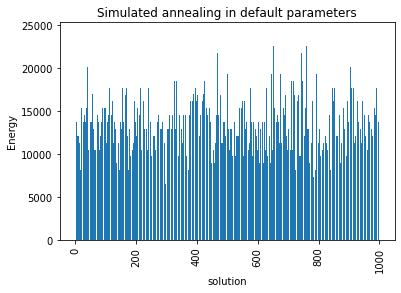

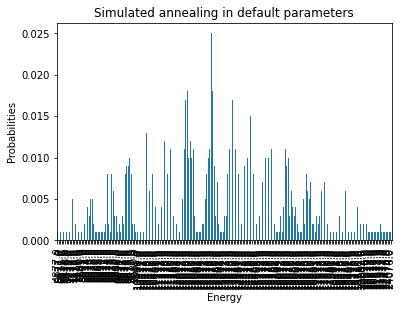

minimum energy: 4877.0


In [ ]:
plot_enumerate(simAnnSamples, title='Simulated annealing in default parameters')
plot_energies(simAnnSamples, title='Simulated annealing in default parameters')

In [ ]:
simAnnSamples.lowest()

SampleSet(rec.array([([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

# Solving this using Quantum Annealing!!

In [ ]:
# https://cloud.dwavesys.com/sapi/
# DEV-a37902a9132a980e3da71d558ab38540284e51fe
if IN_COLAB:
    !dwave setup

Optionally install non-open-source packages and configure your environment.

Do you want to select non-open-source packages to install (y/n)? [y]: y

D-Wave Drivers
These drivers enable some automated performance-tuning features.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: y
Installing: D-Wave Drivers

D-Wave Problem Inspector
This tool visualizes problems submitted to the quantum computer and the results returned.
This package is available under the D-Wave EULA license.
The terms of the license are available online: https://docs.ocean.dwavesys.com/eula
Install (y/n)? [y]: y
Installing: D-Wave Problem Inspector

Creating the D-Wave configuration file.
Configuration file not found; the default location is: /root/.config/dwave/dwave.conf
Configuration file path [/root/.config/dwave/dwave.conf]: 
Configuration file path does not exist. Create it? [y/N]: y
Profile (create ne

In [ ]:
!dwave ping


Using endpoint: https://cloud.dwavesys.com/sapi/
Using solver: Advantage_system1.1
Submitted problem ID: 2403360f-dcab-4d76-9f57-4fbfd3a67f30

Wall clock time:
 * Solver definition fetch: 752.028 ms
 * Problem submit and results fetch: 997.726 ms
 * Total: 1749.754 ms

QPU timing:
 * anneal_time_per_run = 20 us
 * post_processing_overhead_time = 986 us
 * qpu_access_overhead_time = 12499 us
 * qpu_access_time = 26123 us
 * qpu_anneal_time_per_sample = 20 us
 * qpu_delay_time_per_sample = 21 us
 * qpu_programming_time = 26064 us
 * qpu_readout_time_per_sample = 17 us
 * qpu_sampling_time = 58 us
 * readout_time_per_run = 17 us
 * run_time_chip = 58 us
 * total_post_processing_time = 986 us
 * total_real_time = 26123 us


In [ ]:
import dwave_networkx as dnx
from dwave.system import (DWaveSampler, EmbeddingComposite,
                          FixedEmbeddingComposite)
from pprint import pprint

Advantage_system1.1
Number of qubits= 5436
Number of couplers= 37440


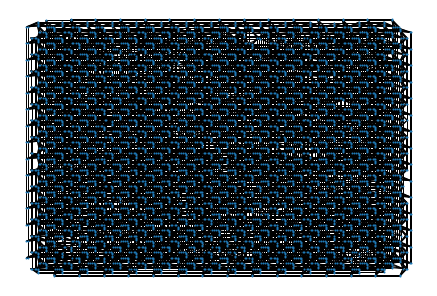

In [ ]:
# Graph corresponding to D-Wave 2000Q
qpu = DWaveSampler()
qpu_edges = qpu.edgelist
qpu_nodes = qpu.nodelist
# pprint(dir(qpu))
if qpu.solver.id == "DW_2000Q_6":
    print(qpu.solver.id)
    X = dnx.chimera_graph(16, node_list=qpu_nodes, edge_list=qpu_edges)
    dnx.draw_chimera(X, node_size=1)
    print('Number of qubits=', len(qpu_nodes))
    print('Number of couplers=', len(qpu_edges))
elif qpu.solver.id == "Advantage_system1.1":
    print(qpu.solver.id)
    X = dnx.pegasus_graph(16, node_list=qpu_nodes, edge_list=qpu_edges)
    dnx.draw_pegasus(X, node_size=1)
    print('Number of qubits=', len(qpu_nodes))
    print('Number of couplers=', len(qpu_edges))

In [ ]:
annealing_time = 60
chain_strength = 0
DWavesampler = EmbeddingComposite(DWaveSampler())
DWaveSamples = DWavesampler.sample(bqm=model_qubo, num_reads=1000,  
                                  # return_embedding=True,  # REMOVE THIS FOR PRINTING LOWEST
                                    chain_strength=chain_strength, 
                                    annealing_time=annealing_time
                                   )

KeyboardInterrupt: ignored

In [ ]:
print(DWaveSamples.info)

{'timing': {'qpu_sampling_time': 168100, 'qpu_anneal_time_per_sample': 60, 'qpu_readout_time_per_sample': 87, 'qpu_access_time': 194134, 'qpu_access_overhead_time': 17790, 'qpu_programming_time': 26034, 'qpu_delay_time_per_sample': 21, 'post_processing_overhead_time': 415, 'total_post_processing_time': 11341, 'total_real_time': 194134, 'run_time_chip': 168100, 'anneal_time_per_run': 60, 'readout_time_per_run': 87}, 'problem_id': '7baf9084-595f-40a8-8cd0-92a7a59a54f2'}


In [ ]:
embedding = DWaveSamples.info['embedding_context']['embedding']
if qpu.solver.id == "DW_2000Q_6":
  dnx.draw_chimera_embedding(X, embedding, node_size=2)
elif qpu.solver.id == "Advantage_system1.1":
  dnx.draw_pegasus_embedding(X, embedding, node_size=2)

KeyError: ignored

minimum energy: 182640.5


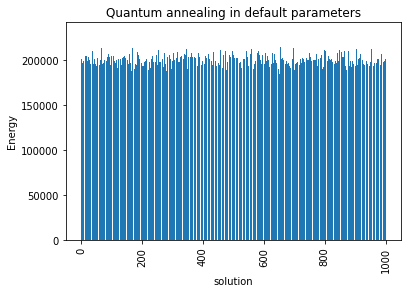

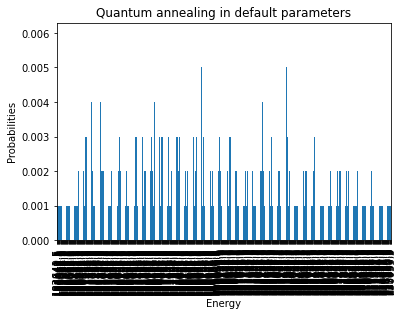

minimum energy: 182640.5


In [ ]:
plot_enumerate(DWaveSamples, title='Quantum annealing in default parameters')
plot_energies(DWaveSamples, title='Quantum annealing in default parameters')


In [ ]:
DWaveSamples.lowest().record[0][0]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
model.display()

Model QST regular method

  Variables:
    x : Size=39, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary
          9 :     0 :   0.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   1.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   1.0 :     1 : False : False : Binary
         14 :  

In [ ]:
from pyomo.core import Var
print(model.component_data_objects(Var))
i = 0
for v in model.component_data_objects(Var):
  print(str(v), v.value, DWaveSamples.lowest().record[0][0][i], simAnnSamples.lowest().record[0][0][i])
  i = i+1

<generator object _BlockData.component_data_objects at 0x7f6968914d00>
x[0] 0.0 1 1
x[1] 0.0 1 0
x[2] 1.0 0 1
x[3] 1.0 1 1
x[4] 1.0 0 1
x[5] 0.0 1 0
x[6] 1.0 0 0
x[7] 0.0 1 1
x[8] 0.0 0 0
x[9] 0.0 1 1
x[10] 0.0 1 0
x[11] 1.0 1 1
x[12] 0.0 0 1
x[13] 1.0 0 0
x[14] 1.0 0 1
x[15] 1.0 1 0
x[16] 0.0 1 1
x[17] 1.0 1 1
x[18] 0.0 1 0
x[19] 0.0 0 1
x[20] 1.0 0 1
x[21] 1.0 1 1
x[22] 1.0 0 0
x[23] 0.0 0 1
x[24] 0.0 1 0
x[25] 0.0 0 0
x[26] 0.0 1 0
x[27] 0.0 0 0
x[28] 0.0 1 0
x[29] 1.0 0 1
x[30] 0.0 1 1
x[31] 1.0 1 1
x[32] 1.0 1 1
x[33] 0.0 0 0
x[34] 0.0 1 0
x[35] 0.0 0 0
x[36] 1.0 0 0
x[37] 0.0 1 1
x[38] 0.0 1 0
